# Deep Learning Project - Image De-Noising
### ESD18I003 - Indra Sena Reddy
### EVD18I017 - Surya Mothukuri

## Importing required libraries and classes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import cv2
import os,random
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import MaxPooling2D,Conv2D,UpSampling2D
from tensorflow.keras import Sequential
from tensorflow.keras.utils import img_to_array


size = 1024

## Importing datasets of Retinal Images

In [ ]:
train_images = []
train = []
path1 = '/content/drive/MyDrive/Dataset/Deep Learning/Project/Data/'
files=sorted(os.listdir(path1))

for i in tqdm(files):
  img = cv2.imread(path1+'/'+i,1) 
  img = cv2.resize(img,(size,size))
  img = img/255
  train.append(i)
  train_images.append(img_to_array(img))

train_data = np.array(train_images)

100%|██████████| 60/60 [00:10<00:00,  5.92it/s]


In [ ]:
# clean_images = []
# clean = []
# path2 = '/content/drive/MyDrive/Dataset/Deep Learning/Project/Good/'
# files=sorted(os.listdir(path2))

# for i in tqdm(files):
#   img = cv2.imread(path2+'/'+i,1) 
#   img = cv2.resize(img,(size,size))
#   img = img/255
#   clean.append(i)
#   clean_images.append(img_to_array(img))

# clean_data = np.array(clean_images)

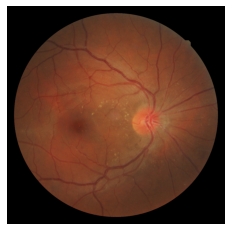

In [ ]:
plt.axis("off")
plt.imshow(cv2.cvtColor(train_data[1], cv2.COLOR_BGR2RGB))
plt.show()

## Building the autoencoder model

In [ ]:
autoencoder_encoder = Sequential()
autoencoder_encoder.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(size,size,3)))
autoencoder_encoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder_encoder.add(Conv2D(16,(3,3),activation='relu',padding='same'))
autoencoder_encoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder_encoder.add(Conv2D(8,(3,3),activation='relu',padding='same'))
autoencoder_encoder.add(MaxPooling2D((2, 2), padding='same'))


autoencoder_decoder = Sequential()
autoencoder_decoder.add(Conv2D(8,(3,3),activation='relu',padding='same'))
autoencoder_decoder.add(UpSampling2D((2,2)))
autoencoder_decoder.add(Conv2D(16,(3,3),activation='relu',padding='same'))
autoencoder_decoder.add(UpSampling2D((2,2)))
autoencoder_decoder.add(Conv2D(32,(3,3),activation='relu',padding='same'))
autoencoder_decoder.add(UpSampling2D((2,2)))
autoencoder_decoder.add(Conv2D(3,(3,3),activation='relu',padding='same'))

autoencoder = Sequential([autoencoder_encoder,autoencoder_decoder])



In [ ]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
autoencoder_encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1024, 1024, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 512, 512, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 256, 256, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 8)       1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 8)      0

In [ ]:
autoencoder_decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 8)       584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 256, 256, 8)      0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 16)      1168      
                                                                 
 up_sampling2d_1 (UpSampling  (None, 512, 512, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 512, 512, 32)      4640      
                                                                 
 up_sampling2d_2 (UpSampling  (None, 1024, 1024, 32)  

In [ ]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 8)       6680      
                                                                 
 sequential_1 (Sequential)   (None, 1024, 1024, 3)     7259      
                                                                 
Total params: 13,939
Trainable params: 13,939
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train,x_test= train_test_split(train_data,test_size=0.2,random_state=42)

## Adding random noise to the images

In [ ]:
noise_factor = 0.25
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

In [ ]:
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.) 
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

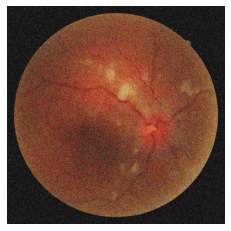

In [ ]:
plt.axis("off")
plt.imshow(cv2.cvtColor(np.array(x_train_noisy[1]), cv2.COLOR_BGR2RGB))
plt.show()

## Training the autoencoder

In [ ]:
history = autoencoder.fit(x_train_noisy,x_train_noisy,epochs=100,batch_size=4)

Epoch 1/100
12/12 [==============================] - 14s 553ms/step - loss: 0.7441 - accuracy: 0.5732
Epoch 2/100
12/12 [==============================] - 7s 555ms/step - loss: 0.5430 - accuracy: 0.6052
Epoch 3/100
12/12 [==============================] - 7s 557ms/step - loss: 0.5235 - accuracy: 0.6052
Epoch 4/100
12/12 [==============================] - 7s 553ms/step - loss: 0.5147 - accuracy: 0.6054
Epoch 5/100
12/12 [==============================] - 7s 561ms/step - loss: 0.5094 - accuracy: 0.6069
Epoch 6/100
12/12 [==============================] - 7s 555ms/step - loss: 0.5085 - accuracy: 0.6246
Epoch 7/100
12/12 [==============================] - 7s 556ms/step - loss: 0.5084 - accuracy: 0.6170
Epoch 8/100
12/12 [==============================] - 7s 558ms/step - loss: 0.5077 - accuracy: 0.6179
Epoch 9/100
12/12 [==============================] - 7s 554ms/step - loss: 0.5073 - accuracy: 0.6092
Epoch 10/100
12/12 [==============================] - 7s 558ms/step - loss: 0.5075 - accur

In [ ]:
x_pred = autoencoder.predict(x_test_noisy)

In [ ]:
#noisy_train[0].shape

In [ ]:
type(x_pred)

numpy.ndarray

## Visualising the results

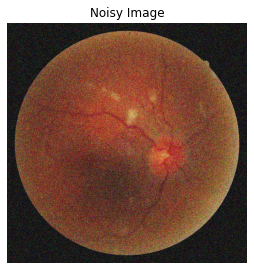

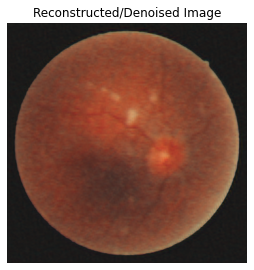

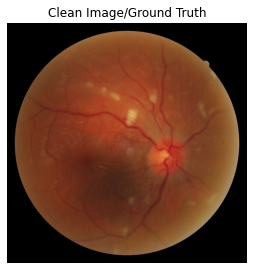

In [ ]:
i=1

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(3,1,1)
plt.axis("off")
plt.imshow(cv2.cvtColor(np.array(x_test_noisy[i]), cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.show()

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(3,1,2)
plt.axis("off")
plt.imshow(cv2.cvtColor(np.array(x_pred[i]), cv2.COLOR_BGR2RGB))
plt.title('Reconstructed/Denoised Image')
plt.show()

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(3,1,3)
plt.axis("off")
plt.imshow(cv2.cvtColor(x_test[i], cv2.COLOR_BGR2RGB))
plt.title('Clean Image/Ground Truth')
plt.show()

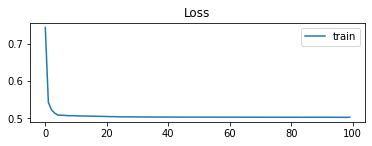

--


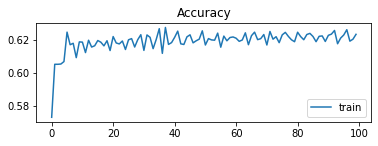

In [ ]:
plt.subplot(2,1,1)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()
print('--')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.show()